In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tools import utils
import matplotlib.ticker as ticker

In [2]:
import sys 
sys.path.append('..')

from tools import amputation
from tools import imputation
from tools import utils
from tools.utils import colors
from tqdm import tqdm

from importlib import reload

In [3]:
from data import fetch_data

In [4]:
plt.style.use(utils.plot_style)

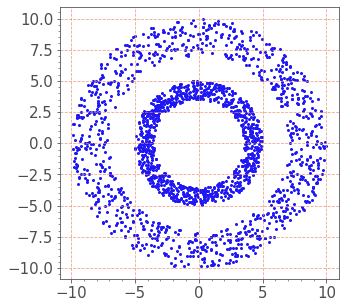

In [5]:
import matplotlib.pyplot as plt
import math
import random
fig, ax = plt.subplots(figsize=(5,5))
x = []
y = []
R = 10
for i in range(1000):
    theta = random.uniform(0,2*math.pi)
    r = random.uniform(R/2,R)
    x.append(math.sqrt(r*R)*math.cos(theta))
    y.append(math.sqrt(r*R)*math.sin(theta))

    
for i in range(1000):
    theta = random.uniform(0,2*math.pi)
    r = random.uniform(R/8,R/4)
    x.append(math.sqrt(r*R)*math.cos(theta))
    y.append(math.sqrt(r*R)*math.sin(theta))

dataset = np.vstack((x,y)).T
    
plt.scatter(x,y)
plt.show()




##  Ampyte

In [10]:
reload(amputation)

<module 'tools.amputation' from '/Users/vladislavbushmakin/Documents/GitHub/Mice/tools/amputation.py'>

In [77]:
imputer_names = ['mean', 'knn', 'mice', 'miceforest']#, 'sinkhorn', 'mean', 'linearRR', 'midas']
p_miss = 0.7
mech = "MAR"
ncols = len(imputer_names)
datasets_miss = []
imps = []
X_miss, mask = amputation.ampute(dataset, 0.5, "MAR")

In [78]:
reload(imputation)

<module 'tools.imputation' from '/Users/vladislavbushmakin/Documents/GitHub/Mice/tools/imputation.py'>

## Toy impute

In [79]:
for imputer_name in imputer_names:    
    imp = imputation.impute(X_miss, imputer_name)
    datasets_miss.append(X_miss)
    imps.append(imp)

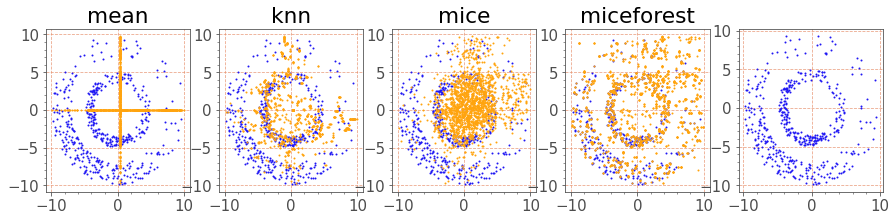

In [80]:
ncols = len(imputer_names)
fig, axs = plt.subplots(ncols=ncols + 1, nrows = 1, figsize=(3*(ncols + 1), 3))
for i in range(ncols):
    axs[i].plot(datasets_miss[i][:,0],datasets_miss[i][:,1], 'o')
    axs[i].plot(imps[i][np.where(mask)[0]][:,0],imps[i][np.where(mask)[0]][:,1], 'o')
    axs[i].set_title(f"{imputer_names[i]}", fontsize="x-large")

axs[-1].plot(datasets_miss[0][:,0],datasets_miss[0][:,1], 'o')
plt.savefig(f"figures/{mech}_{np.array(p_miss)*100} %, impute: {imputer_names}.png", dpi=200)

# Diabetes data

-- age age in years


-- sex


bmi body mass index


bp average blood pressure


s1 tc, total serum cholesterol


s2 ldl, low-density lipoproteins


s3 hdl, high-density lipoproteins


s4 tch, total cholesterol / HDL


s5 ltg, possibly log of serum triglycerides level


s6 glu, blood sugar level

In [1294]:
X_full, y_full = load_diabetes(return_X_y=True,as_frame=True, scaled=True)

In [929]:
X_full.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


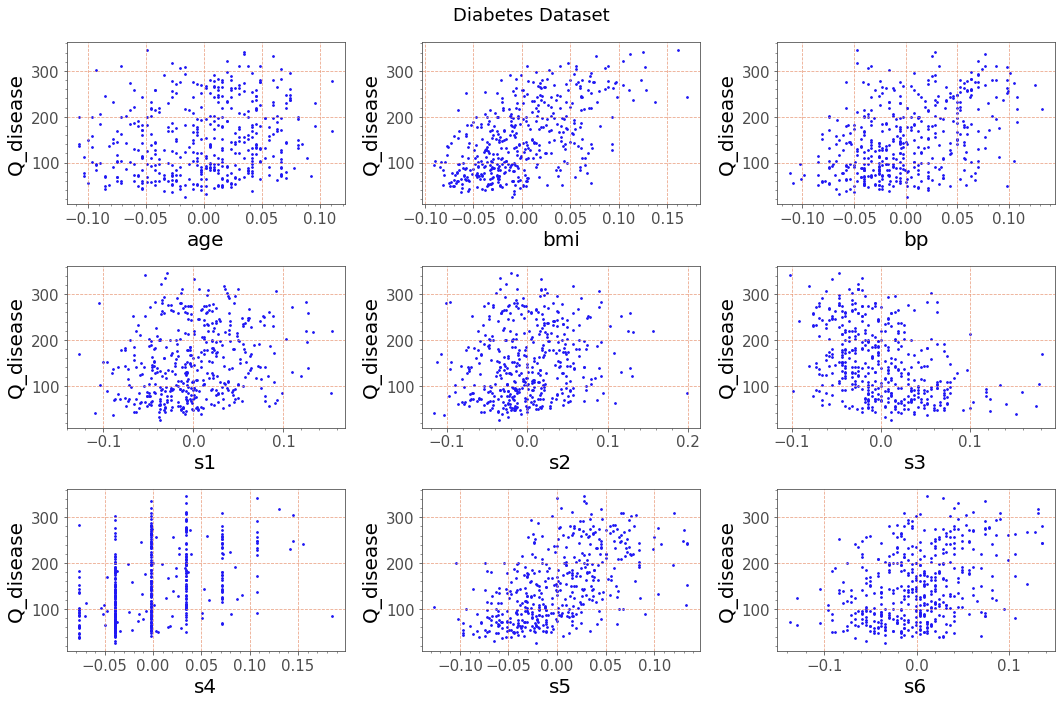

In [930]:
# Don't plot the sex data
features = list(X_full.columns)
features.remove('sex')

# Plot
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
# fig.figure(figsize=(25, 20))
fig.suptitle('Diabetes Dataset')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(X_full[feature], y_full, s=3, marker='o')
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('Q_disease')
plt.tight_layout()
plt.savefig(f"figures/q_disease_full.png", dpi=200)

#### Correlation map

In [1284]:
corr = X_full.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30
sex,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21
bmi,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39
bp,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39
s1,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33
s2,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29
s3,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27
s4,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46
s6,0.30,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00


#### Plot most correlated parameters

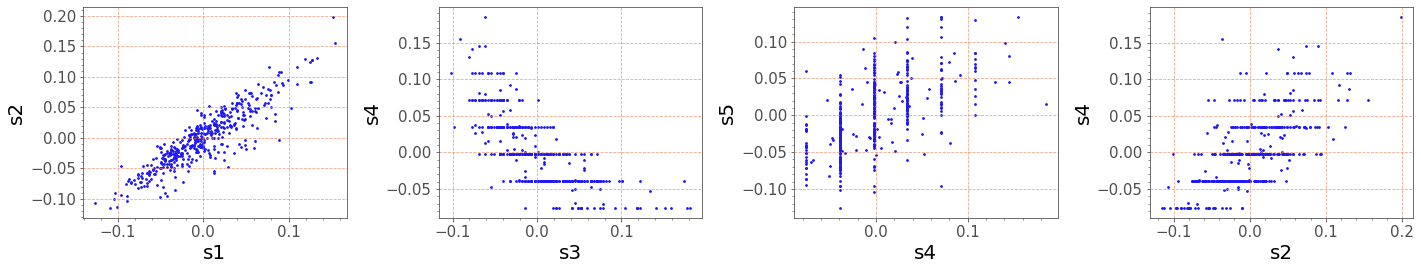

In [932]:
params = [['s1', 's2'], ['s3', 's4'], ['s4', 's5'], ['s2', 's4']]
ncols = len(params)
fig, axs = plt.subplots(ncols=ncols, nrows = 1, figsize=(5*(ncols), 4))
for i, param in enumerate(params):
    axs[i].scatter(X_full[param[0]], X_full[param[1]], s=3, marker='o')
    axs[i].set_xlabel(param[0])
    axs[i].set_ylabel(param[1])

plt.tight_layout()
plt.savefig(f"figures/most_correlated.png", dpi=200)


In [933]:
# html = corr.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2).render()
# import imgkit
# imgkit.from_string(html, "figures/corr_full.pdf")

#### Sorted correlation for better visibility

In [934]:
def sorted_corr_pairs(corr_df):
    corr_pairs = []
    indxs = []
    col_names = []
    for idx, col in enumerate(X_full.columns):
        corr_line = corr_df[X_full.columns[X_full.columns != col]].loc[col]
        corr_pairs.append(corr_line)
        col_names.append([col + '-' + col_i for col_i in X_full.columns[X_full.columns != col]])

    
    corr_pairs_flat = np.array(corr_pairs).flatten()
    
    sort_idxs = np.argsort(corr_pairs_flat)
#     sort_idxs = [idx for idx in sort_idxs if idx < len(corr_pairs_flat)/2]
#     corr_pairs_flat, idx_uniq, inv = np.unique(corr_pairs_flat, return_index=True, return_inverse=True)
    
    col_names = np.array(col_names).flatten()
    return corr_pairs_flat, sort_idxs[::2], col_names

In [1285]:
corr_pairs_flat, sort_idxs, col_names = sorted_corr_pairs(corr)

<Figure size 1440x720 with 0 Axes>

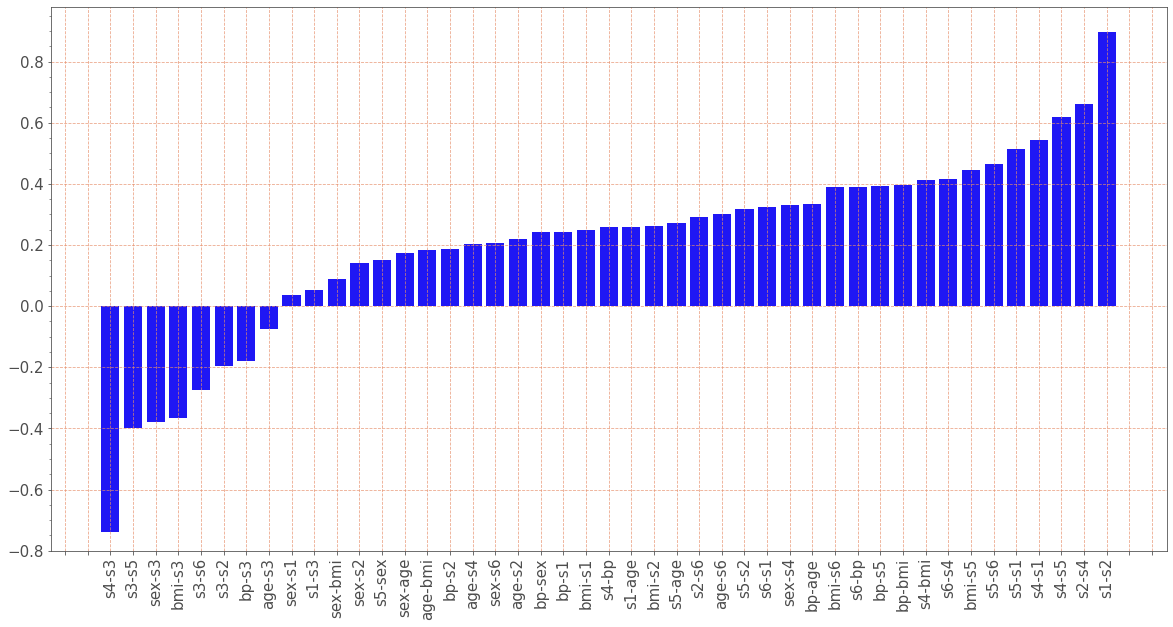

In [1286]:
plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat[sort_idxs])
# ax.grid(which='major')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=90);
plt.ylim(-0.8)
# plt.xticks(col_names[sort_idxs][::2]);
plt.savefig(f"figures/sorted_correlated.png", dpi=200)

<AxesSubplot:>

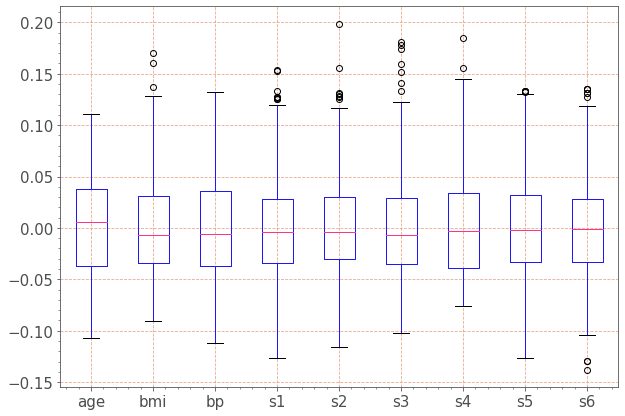

In [1287]:
X_full.drop("sex",axis=1).boxplot(figsize = [10, 7])
# plt.show()

## Ampute diabetes

In [1288]:
reload(amputation)

<module 'tools.amputation' from '/Users/vladislavbushmakin/Documents/GitHub/Mice/tools/amputation.py'>

In [938]:
p_miss = 0.5
p_mech = 'MAR'
X_miss, mask = amputation.ampute(X_full, p_miss, p_mech, vars_observed=[0, 2], score_func='SIGMOID-LEFT',frame=True)#weights = [-10,1,-5,-5,0,-20,1,2,-3,10]

In [1296]:
# X_miss, mask = amputation.ampute(X_full, p_miss, p_mech, vars_observed=[0, 2], score_func='SIGMOID-LEFT',frame=True)#weights = [-10,1,-5,-5,0,-20,1,2,-3,10]
X_miss, mask = amputation_2.produce_NA(X_full, p_miss=0.5, mecha='MAR', frame=True)

In [1297]:
# mask = pd.DataFrame(~np.random.choice([0, 1], size=(X_full.shape), p=[3./4, 1./4]).astype(bool), columns = X_full.columns)
# X_miss = X_full
# X_miss = X_miss[~mask]

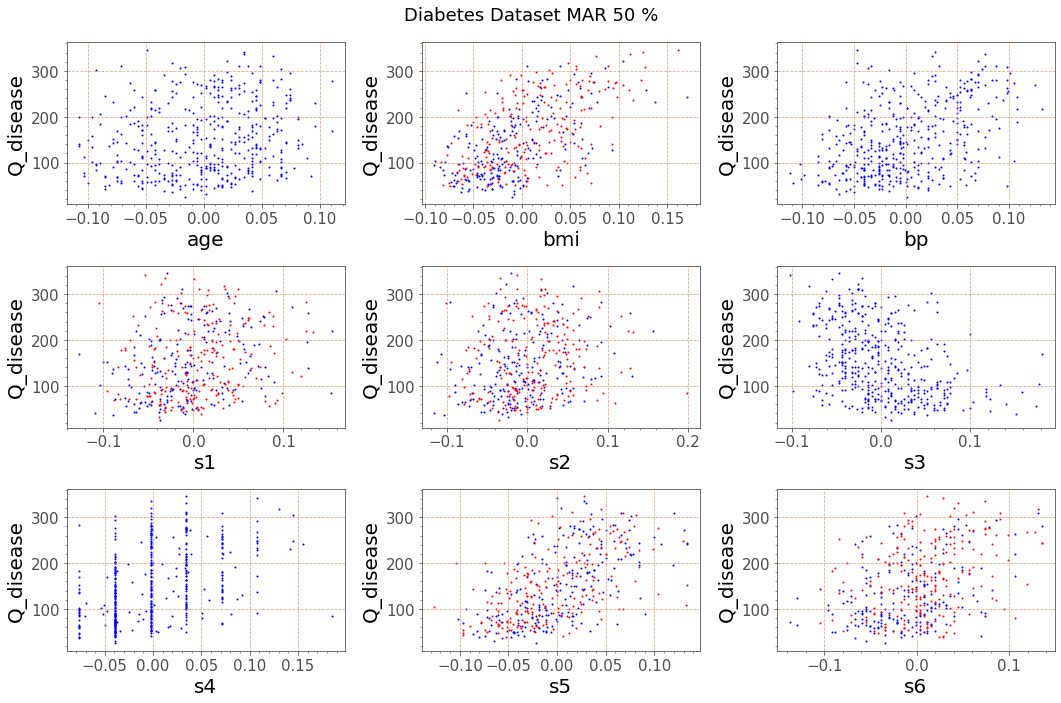

<Figure size 864x432 with 0 Axes>

In [1298]:
# Don't plot the sex data
features = list(X_miss.columns)
features.remove('sex')

# Plot
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
# fig.figure(figsize=(25, 20))
fig.suptitle('Diabetes Dataset MAR 50 %')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(X_miss[feature], y_full, s=1, color='b')
        axs[i, j].scatter(X_full[mask][feature], y_full, s=1, color='r')
        axs[i, j].set_xlabel(feature)
#         axs[i, j].set_ylabel('s1')
        axs[i, j].set_ylabel('Q_disease')
plt.tight_layout()
plt.show()
plt.savefig(f"figures/q_disease_ampute_{p_mech}_{p_miss}.png", dpi=200)

In [1299]:
corr_miss = X_miss.corr()
corr_miss.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.00,0.17,0.19,0.34,0.33,0.17,-0.08,0.20,0.17,0.28
sex,0.17,1.00,0.18,0.24,0.09,0.02,-0.38,0.33,0.20,0.15
bmi,0.19,0.18,1.00,0.45,0.40,0.37,-0.38,0.46,0.51,0.32
bp,0.34,0.24,0.45,1.00,0.21,0.18,-0.18,0.26,0.40,0.39
s1,0.33,0.09,0.40,0.21,1.00,0.91,-0.10,0.66,0.59,0.33
s2,0.17,0.02,0.37,0.18,0.91,1.00,-0.22,0.68,0.43,0.33
s3,-0.08,-0.38,-0.38,-0.18,-0.10,-0.22,1.00,-0.74,-0.35,-0.20
s4,0.20,0.33,0.46,0.26,0.66,0.68,-0.74,1.00,0.57,0.36
s5,0.17,0.20,0.51,0.40,0.59,0.43,-0.35,0.57,1.00,0.47
s6,0.28,0.15,0.32,0.39,0.33,0.33,-0.20,0.36,0.47,1.00


In [1300]:
corr_pairs_flat_miss, sort_idxs_miss, names = sorted_corr_pairs(corr_miss)

<Figure size 1440x720 with 0 Axes>

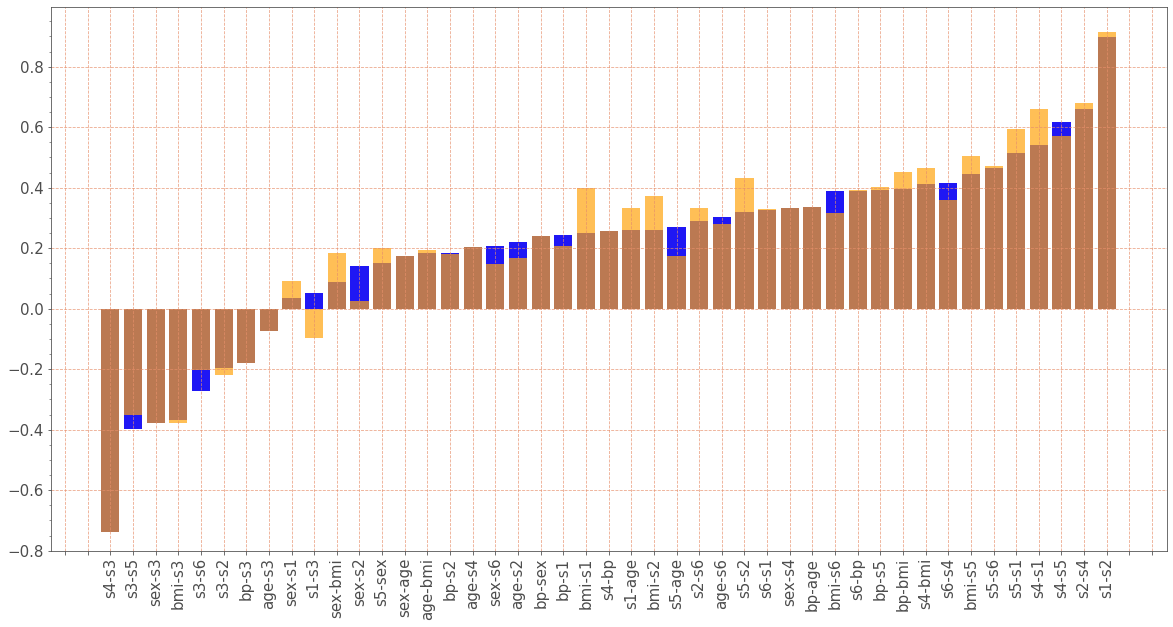

In [1301]:
plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat[sort_idxs])
ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat_miss[sort_idxs], alpha=0.7)
# ax.grid(which='major')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=90);
plt.ylim(-0.8)
# plt.xticks(col_names[sort_idxs][::2]);
plt.savefig(f"figures/sorted_correlated_amputed_{p_mech}_{p_miss}.png", dpi=200)

## Impute diabetes

In [1302]:
reload(imputation)

<module 'tools.imputation' from '/Users/vladislavbushmakin/Documents/GitHub/Mice/tools/imputation.py'>

In [1303]:
imp_method = 'miceforest'
imp = imputation.impute(X_miss, imp_method,frame=True)

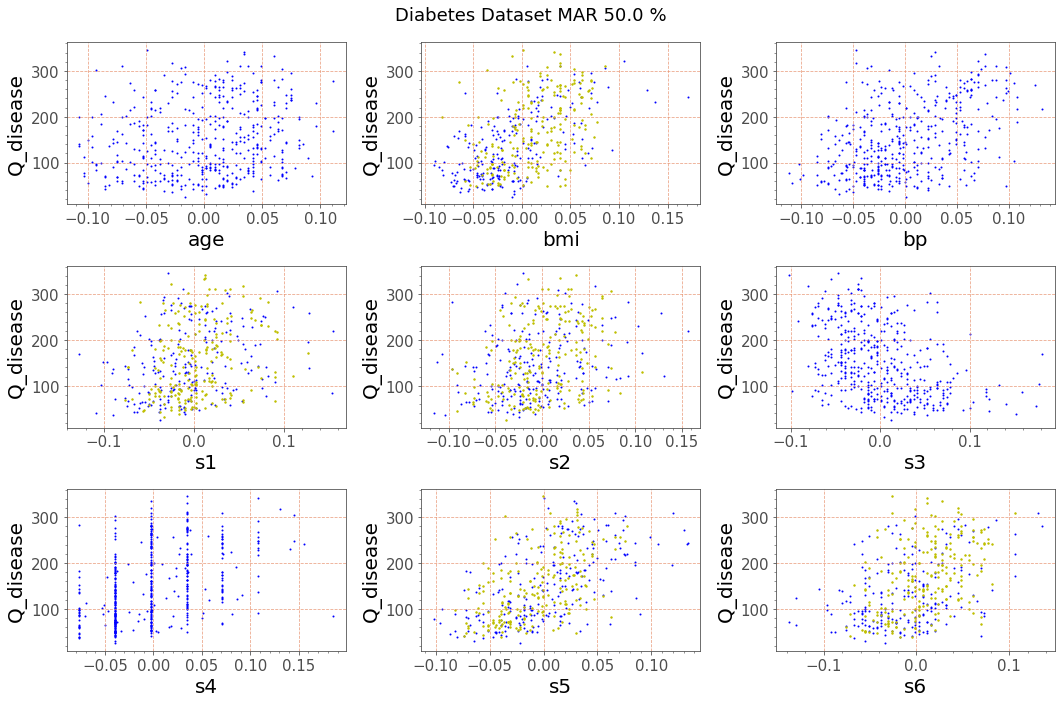

In [1304]:
# Don't plot the sex data
features = list(imp.columns)
features.remove('sex')

# Plot
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
# fig.figure(figsize=(25, 20))
fig.suptitle(f'Diabetes Dataset {p_mech} {100 * p_miss} %')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(X_miss[feature], y_full, s=1, color='b')
        axs[i, j].scatter(imp[mask][feature], y_full, s=2, color='y')
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('Q_disease')
plt.tight_layout()
plt.savefig(f"figures/q_disease_impute_{imp_method}_{p_mech}_{p_miss}.png", dpi=200)
plt.show()

In [1305]:
corr_pairs_flat_imp, sort_idxs_imp, names = sorted_corr_pairs(imp.corr())

<Figure size 1440x720 with 0 Axes>

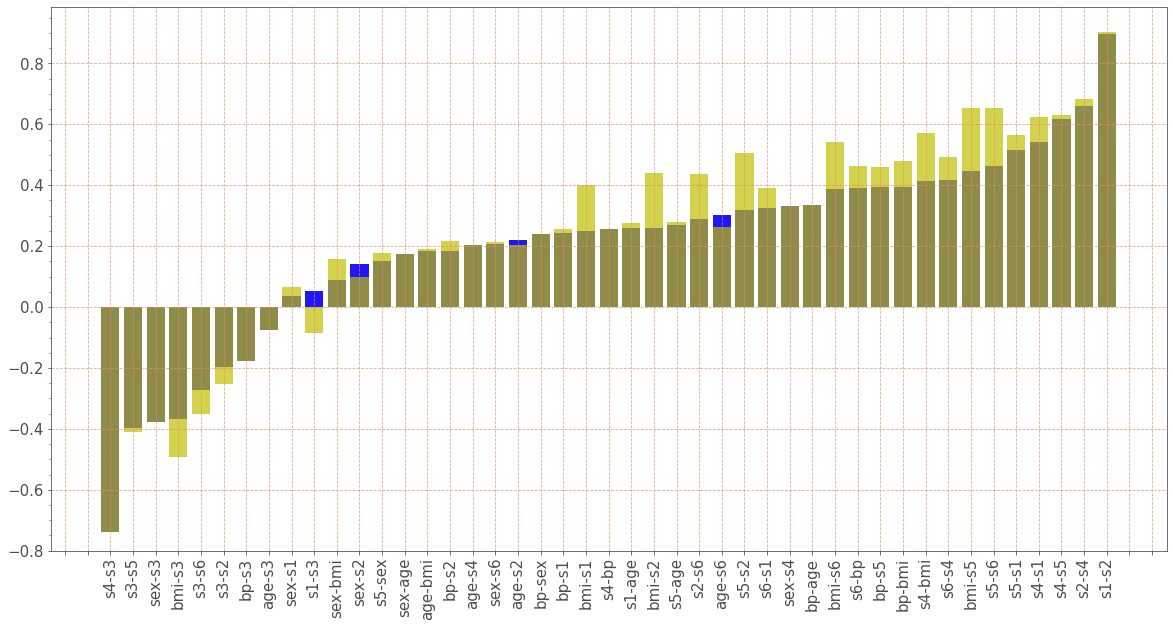

In [1311]:
plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
# ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat[sort_idxs])/
ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat[sort_idxs])
# ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat_miss[sort_idxs], alpha=0.4, color='r')
ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat_imp[sort_idxs], alpha=0.7,  color='y')
# ax.grid(which='major')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=90);
plt.ylim(-0.8)
# plt.xticks(col_names[sort_idxs][::2]);
plt.savefig(f"figures/sorted_correlated_imputed_{p_mech}_{p_miss}_{imp_method}.png", dpi=200)

In [1312]:
from numpy import mean, absolute

def mae_calc(imp, full, mask):
    return (np.abs(np.array(imp)[mask] - np.array(full)[mask]).sum()) / np.array(mask).sum()  

In [1313]:
mae_calc(imp, X_full, mask).sum()

0.03061729198463503

In [1314]:
np.abs(corr_pairs_flat_miss[sort_idxs] - corr_pairs_flat[sort_idxs]).sum()

1.9921767998031146

In [1315]:
np.abs(corr_pairs_flat_imp[sort_idxs] - corr_pairs_flat[sort_idxs]).sum()

2.6223901259921876

## Analisys of the imputation

### Linear regression on amputed and imputed data

In [1316]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, mean_squared_error, r2_score

In [1317]:
from sklearn.datasets import fetch_california_housing

In [1377]:
X_full, y_full = X_full, y_full = load_diabetes(return_X_y=True, as_frame=True)#load_linnerud(return_X_y=True,as_frame=True)#, scaled=True)
# X_full = pd.concat([X_full, y_full], join='outer', axis=1)

In [1378]:
# X_full.head()

In [1379]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

In [1380]:
# p_miss = 0.2
# p_mech = 'MAR'
# X_miss, mask = amputation.ampute(X_full, p_miss, p_mech, vars_observed=[0, 2], score_func='SIGMOID-LEFT',frame=True)#weights = [-10,1,-5,-5,0,-20,1,2,-3,10]

In [1388]:
from tools import amputation_2
from sklearn import linear_model

In [1382]:
X_full, y_full = X_full, y_full = load_diabetes(return_X_y=True, as_frame=True)#load_linnerud(return_X_y=True,as_frame=True)#, scaled=True)
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)
X_miss, mask = amputation_2.produce_NA(X_full, p_miss=0.5, mecha='MAR', frame=True)

In [1466]:
X_miss, mask = amputation_2.produce_NA(X_full, p_miss=0.6,p_obs=0.4, mecha='MAR', frame=True)

In [1588]:
def score_linear_reg(imp_methods=['mean'], p_miss=0.2,p_obs=0.8, mecha = 'MCAR'):
    test_size = 0.2
#     train_size = 0.
    X_full, y_full = X_full, y_full = load_diabetes(return_X_y=True, as_frame=True)
    X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,  test_size=test_size,random_state=42)
#     X_miss, mask = amputation_2.produce_NA(X_full, p_miss=p_miss,p_obs=p_obs, mecha=mecha, frame=True)
    X_miss, mask = amputation.ampute(X_full, p_miss, p_mech, vars_observed=[0, 2], score_func='SIGMOID-TAIL',frame=True)
    
    clf = linear_model.LinearRegression()#BayesianRidge()
    clf.fit(X_train, y_train)
    predict_full = clf.score(X_test, y_test)
    
    
    X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X_miss).dropna(), y_full[pd.DataFrame(X_miss).dropna().index],  test_size=test_size, random_state=42)
    clf = linear_model.BayesianRidge()
    clf.fit(X_train, y_train)
    predict_miss = clf.score(X_test, y_test)
    
    predict_imps = []
    for imp_method in imp_methods:
        imp = imputation.impute(pd.DataFrame(X_miss), imp_method,frame=True)
        X_train, X_test, y_train, y_test = train_test_split(imp, y_full,  test_size=test_size, random_state=42)
        clf = linear_model.BayesianRidge()
        clf.fit(X_train, y_train)
        predict_imp = clf.score(X_test, y_test)
        predict_imps.append(predict_imp)
    return predict_full, predict_miss, *predict_imps




In [1589]:
# predict_full, predict_miss, predict_imp, predict_imp_mice = score_linear_reg(imp_method='mean', p_miss=0.4, mecha = 'MCAR')

In [1694]:
predictions = []
predictions_std = []
n_iters = 5
imp_methods = ['mean', 'mf', 'knn', 'mice']
for p_miss in [0.05, 0.2, 0.4, 0.6]:
    pred_iter = []
    for iter_ in range(n_iters):
        predict_full, predict_miss, *predict_imps = score_linear_reg(imp_methods=imp_methods, p_miss=p_miss, mecha = 'MCAR')
        pred_iter.append([predict_full, predict_miss, *predict_imps])
    predictions.append(list(np.array(pred_iter).mean(axis=0)))
    predictions_std.append(list(np.array(pred_iter).std(axis=0)))

In [1738]:
reload(utils)

<module 'tools.utils' from '/Users/vladislavbushmakin/Documents/GitHub/Mice/tools/utils.py'>

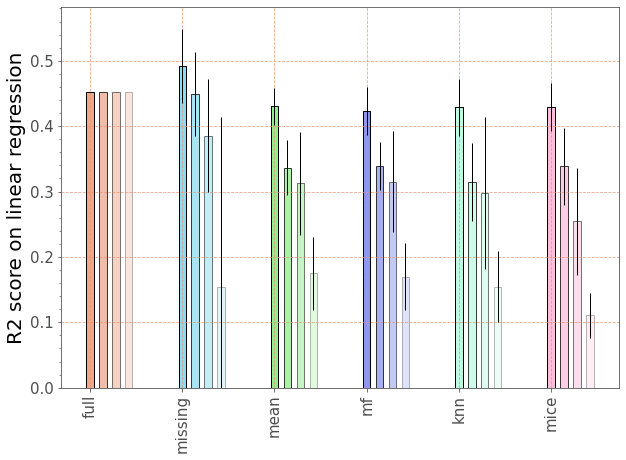

In [1739]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
alpha = 1
xs = 5 * np.array(range(len(predictions[0])), dtype=np.float32)

for predict, predict_std in zip(predictions, predictions_std):
    predict_full, predict_miss, *predict_imp = predict
    predict_full_std, predict_miss_std, *predict_imp_std = predict_std
    ax.bar(x=xs, height=[predict_full, predict_miss,*predict_imp ], width=0.4, yerr = [predict_full_std, predict_miss_std, *predict_imp_std], alpha = alpha, color=utils.colors, edgecolor='black')
    alpha -= 0.24
    xs += 0.7
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(plt.NullLocator())#plt.gca().xaxis.set_major_locator(plt.NullLocator())
# ax.xaxis.set_minor_locator(None)
plt.xticks(rotation=90);
ax.set_xticks(xs.astype(int) - int(len(predictions)/2), minor=False)
ax.set_xticklabels(['full', 'missing', *imp_methods])
# ax.set_xlim(-2, 8)
ax.set_ylim(0)
ax.set_ylabel("R2 score on linear regression")
# plt.xticks(col_names[sort_idxs][::2]);
plt.savefig(f"figures/linear_scores_{p_mech}_{p_miss}_{imp_method}.png", dpi=200)

### MICE and Rubins pooling

In [1696]:
def variance_model_coef(y_true, y_pred, X):
    """Calculates variance of the coefficients."""
    residual_sum_squares = np.sum((y_true - y_pred) ** 2)
    residual_mean_square = residual_sum_squares / (len(y_true) - 2)
    return residual_mean_square / (X ** 2).sum(axis=0)


def rubins_pooling_rules(m_coefs, m_vars_coefs):
    """Applies Rubin's pooling rules.
    The final weights is defined as the mean of the weights across the imputed
    datasets while the total variance is defined as the combination of the mean
    of the variance of the weights and the variance of the coefficients.
    Parameters
    ----------
    m_coefs : ndarray, shape (n_imputations, n_features)
        The weights of the model fitted on each imputed dataset.
    m_vars_coefs : ndarray, shape (n_imputations, n_features)
        An estimate of the variance of the weights on each imputed dataset.
    Returns
    -------
    mean_coefs : ndarray, shape (n_features,)
        The mean coefficients computed across the imputed datasets.
    total_var_coefs : ndarray, shape (n_features,)
        An estimate of the total variation of the weights across the imputed
        datasets.
    """
    mean_coefs = np.mean(m_coefs, axis=0)
    mean_vars_coefs = np.mean(m_vars_coefs, axis=0)
    vars_coefs = np.var(m_coefs, axis=0, ddof=1)
    total_var_coefs = mean_vars_coefs + (1 + 1 / vars_coefs.shape[0]) * vars_coefs
    return mean_coefs, total_var_coefs

In [1697]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

In [1704]:
n_imputations = 5
test_size = 0.2
p_miss=0.2
p_obs=0.8
mecha = 'MCAR'

X_full, y_full = X_full, y_full = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,  test_size=test_size,random_state=42)
X_miss, mask = amputation.ampute(X_full, p_miss, p_mech, vars_observed=[0, 2], score_func='SIGMOID-TAIL',frame=True)

m_coefs = []
m_vars = []
for i in range(n_imputations):
    imp = IterativeImputer(max_iter = 50, random_state = i, sample_posterior = True, estimator = linear_model.BayesianRidge()).fit_transform(X_miss)
    X_train, X_test, y_train, y_test = train_test_split(imp, y_full,  test_size=test_size, random_state=42)
    clf = linear_model.LinearRegression()#BayesianRidge()
    clf.fit(X_train, y_train)
    y_pred = clf.score(X_test, y_test)
    m_coef, m_var = clf.coef_, variance_model_coef(y_train, y_pred, imp)
    m_coefs.append(m_coef)
    m_vars.append(m_var)
m_coefs = np.array(m_coefs)
m_vars = np.array(m_vars)

In [1709]:
print("Result of the pooling by Rubin's rules: ", rubins_pooling_rules(m_coefs, m_vars))

Result of the pooling by Rubin's rules:  (array([ 101.23870424, -199.70593538,  406.33723467,  310.64663605,
       -605.85225286,  246.41264483,  193.03109013,  383.62192887,
        516.46457773,   16.45915806]), array([ 33454.01629348,  34419.74547519,  32564.59195426,  29334.17414893,
       115656.36543605, 120425.08567002,  53708.89032856,  56158.29372547,
        45198.15073213,  32991.22665815]))


In [1713]:
means = rubins_pooling_rules(m_coefs, m_vars)[0]
varis = rubins_pooling_rules(m_coefs, m_vars)[1]

In [1718]:
means

array([ 101.23870424, -199.70593538,  406.33723467,  310.64663605,
       -605.85225286,  246.41264483,  193.03109013,  383.62192887,
        516.46457773,   16.45915806])

In [1720]:
np.sqrt(varis)

array([182.90439113, 185.52559251, 180.4566207 , 171.27222235,
       340.08288025, 347.02317742, 231.75178603, 236.97741185,
       212.5985671 , 181.63487181])

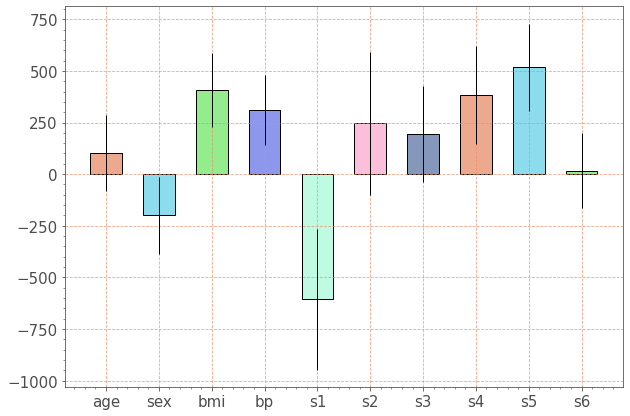

In [1741]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.bar(x=X_full.columns, 
       height=means, 
       width=0.6, 
       yerr = np.sqrt(varis), 
       alpha=1, color=utils.colors, 
       edgecolor='black')
# plt.title("Coefficeints of the linear regression and their variances pooled by the Rubin's rule")
plt.savefig(f"figures/rubin_pooling_{p_mech}_{p_miss}_{imp_method}.png", dpi=200)